# **Projet DataMining**


In [ ]:
import pandas as pd
import random
df = pd.read_csv("/kaggle/input/mushrooms-dataset/data.csv")

Ce jeu de données porte  sur les champignons destiné à la classification binaire, disponible à la bibliothèque de l'UCI. Ce jeu de données sera nettoyé en utilisant diverses techniques 
1. Les valeurs manquantes ont été traitées en utilisant la méthode K plus proches voisins (KNN) pour estimer les valeurs manquantes à partir des voisins les plus proches dans l'espace des caractéristiques.
   
2. Les colonnes présentant un grand nombre de valeurs manquantes ont été éliminées du jeu de données pour éviter d'introduire des biais dans l'entraînement des modèles.

3. Les variables catégorielles ont été encodées en utilisant l'encodeur d'étiquettes (LabelEncoder) pour les convertir en valeurs numériques, nécessaire pour l'entraînement des modèles.

4. Les caractéristiques numériques ont été normalisées en utilisant la normalisation Z-score pour mettre à l'échelle les valeurs et rendre les caractéristiques comparables entre elles.. Il contient 9 colonnes :

* Diamètre du chapeau
* Forme du chapeau
* Attachement des lames
* Couleur des lames
* Hauteur du pied
* Largeur du pied
* Couleur du pied
* Saison
* Classe cible - Est-ce comestible ou non ?
La classe cible contient deux valeurs - 0 ou 1 - où 0 fait référence à comestible et 1 fait référence à vénéneux.

In [4]:
df.isna().sum()

cap-diameter                0
cap-shape                   0
cap-surface              7001
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          3530
gill-spacing            11943
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               24298
stem-surface            19003
stem-color                  0
veil-type               26122
veil-color              24004
has-ring                    0
ring-type                1412
spore-print-color       26416
habitat                     0
season                      0
class                       0
dtype: int64

Le DataFrame a des valeurs manquantes dans plusieurs colonnes. Les colonnes cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type et spore-print-color ont respectivement 7001, 3530, 11943, 24298, 19003, 26122, 24004, 1412 et 26416 valeurs manquantes.

In [6]:
na_columns = ['spore-print-color','veil-color','veil-type','stem-root','stem-surface','gill-spacing']
df.drop(na_columns, inplace=True, axis=1)

Le DataFrame a été modifié pour supprimer les colonnes contenant Les valeurs manquantes les plus nombreuses . Les colonnes spore-print-color, veil-color, veil-type, stem-root, stem-surface et gill-spacing ont été supprimées.

In [7]:
df.columns

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season', 'class'],
      dtype='object')

In [8]:
df.dtypes

cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
ring-type                object
habitat                  object
season                   object
class                    object
dtype: object

Les colonnes cap-diameter, stem-height et stem-width sont de type float64, ce qui signifie qu'elles contiennent des valeurs numériques décimales.
Les colonnes cap-shape, cap-surface, cap-color, does-bruise-or-bleed, gill-attachment, gill-color, stem-color, has-ring, ring-type, habitat, season et class sont de type object, ce qui indique qu'elles contiennent des données textuelles ou catégorielles.

In [9]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns

In [10]:
df

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w,p
1,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u,p
2,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w,p
3,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w,p
4,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28176,4.67,o,NaN,n,f,f,f,4.69,19.96,n,f,f,d,s,e
28177,7.28,c,NaN,n,f,f,f,5.29,18.54,n,f,f,l,s,e
28178,6.60,p,NaN,n,f,f,f,5.52,18.88,n,f,f,l,s,e
28179,4.19,c,NaN,n,f,f,f,4.22,19.02,n,f,f,d,s,e


In [11]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    label_encoder = LabelEncoder()
    col_data = df[col].dropna()
    encoded_data = label_encoder.fit_transform(col_data)
    df[col] = df[col].apply(lambda x: label_encoder.transform([x])[0] if pd.notna(x) else None)


In [12]:
df.isna().sum()

cap-diameter               0
cap-shape                  0
cap-surface             7001
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         3530
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1412
habitat                    0
season                     0
class                      0
dtype: int64

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed_data = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [14]:
df_imputed

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,15.26,6.0,2.0,6.0,0.0,2.0,10.0,16.95,17.09,10.0,1.0,2.0,0.0,3.0,1.0
1,16.60,6.0,2.0,6.0,0.0,2.0,10.0,17.99,18.19,10.0,1.0,2.0,0.0,2.0,1.0
2,14.07,6.0,2.0,6.0,0.0,2.0,10.0,17.80,17.74,10.0,1.0,2.0,0.0,3.0,1.0
3,14.17,2.0,3.0,1.0,0.0,2.0,10.0,15.77,15.98,10.0,1.0,5.0,0.0,3.0,1.0
4,14.64,6.0,3.0,6.0,0.0,2.0,10.0,16.53,17.20,10.0,1.0,5.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28176,4.67,3.0,6.0,5.0,0.0,3.0,2.0,4.69,19.96,5.0,0.0,1.0,0.0,1.0,0.0
28177,7.28,1.0,6.6,5.0,0.0,3.0,2.0,5.29,18.54,5.0,0.0,1.0,3.0,1.0,0.0
28178,6.60,4.0,6.4,5.0,0.0,3.0,2.0,5.52,18.88,5.0,0.0,1.0,3.0,1.0,0.0
28179,4.19,1.0,6.2,5.0,0.0,3.0,2.0,4.22,19.02,5.0,0.0,1.0,0.0,1.0,0.0


In [15]:
df['class'].value_counts()

class
0    26919
1     1262
Name: count, dtype: int64

In [16]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


X = df_imputed.drop('class', axis=1)
y = df_imputed['class']

estimator = LogisticRegression()

rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X, y)

selected_features = X.columns[rfecv.support_]



In [17]:
selected_features

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-height', 'stem-color',
       'has-ring', 'ring-type', 'habitat', 'season'],
      dtype='object')

In [26]:
X_selected = X[selected_features]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=1)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

In [21]:
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)


rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Logistic Regression:
Accuracy: 0.8457717327025429
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      8045
         1.0       0.22      0.83      0.34       410

    accuracy                           0.85      8455
   macro avg       0.60      0.84      0.63      8455
weighted avg       0.95      0.85      0.88      8455


Random Forest:
Accuracy: 0.930455351862803
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      8045
         1.0       0.39      0.80      0.53       410

    accuracy                           0.93      8455
   macro avg       0.69      0.87      0.74      8455
weighted avg       0.96      0.93      0.94      8455


Decision Tree:
Accuracy: 0.7777646363098758
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87      8045
         1.0       0.16      

**Interprétation**

Précision: La précision mesure la proportion d'observations positives correctement identifiées par le modèle. Une précision de 0.846 pour la régression logistique, 0.930 pour la forêt aléatoire et 0.778 pour l'arbre de décision signifie que la forêt aléatoire a la meilleure précision.

Rappel: Le rappel mesure la proportion d'observations positives réellement identifiées parmi toutes les observations réellement positives. Un rappel de 0.85 pour la régression logistique, 0.94 pour la forêt aléatoire et 0.77 pour l'arbre de décision signifie que la forêt aléatoire a le meilleur rappel.

F1-score: Le F1-score est une moyenne pondérée de la précision et du rappel. Un F1-score de 0.91 pour la régression logistique, 0.96 pour la forêt aléatoire et 0.87 pour l'arbre de décision signifie que la forêt aléatoire a le meilleur F1-score.

In [23]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Decision Tree parameter grid
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}
#Random Forest parameter grid
rf_param_grid = {
     'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split

}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Accuracy Score for Logistic Regression:", lr_grid_search.best_score_)


dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Accuracy Score for Decision Tree:", dt_grid_search.best_score_)


rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_resampled, y_train_resampled)
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Accuracy Score for Random Forest:", rf_grid_search.best_score_)

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Best Accuracy Score for Logistic Regression: 0.8427220976367087
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Accuracy Score for Decision Tree: 0.8785250991892358
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy Score for Random Forest: 0.8914317750560634


**Interprétation**

Régression logistique : Les meilleurs paramètres sont C=0.1 et 'penalty'='l2', avec une meilleure précision de 0.843.

Arbre de décision : Les meilleurs paramètres sont 'max_depth'=5, 'min_samples_leaf'=4 et 'min_samples_split'=10, avec une meilleure précision de 0.879.

Forêt aléatoire : Les meilleurs paramètres sont 'max_depth'=None, 'max_features'='log2', 'min_samples_leaf'=2, 'min_samples_split'=10 et 'n_estimators'=50, avec une meilleure précision de 0.891.

In [29]:
# Logistic Regression
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Random Forest
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Logistic Regression:
Accuracy: 0.8431697220579538
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      8045
         1.0       0.21      0.83      0.34       410

    accuracy                           0.84      8455
   macro avg       0.60      0.84      0.63      8455
weighted avg       0.95      0.84      0.88      8455


Decision Tree:
Accuracy: 0.9681845062093436
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      8045
         1.0       0.64      0.80      0.71       410

    accuracy                           0.97      8455
   macro avg       0.81      0.89      0.85      8455
weighted avg       0.97      0.97      0.97      8455


Random Forest:
Accuracy: 0.984033116499113
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8045
         1.0       0.87      

**Interprétation**

Régression Logistique :

Exactitude (Accuracy) : 84.3%
Précision élevée pour les champignons comestibles, mais faible pour les champignons vénéneux.
Bon rappel pour les champignons vénéneux, mais moins bon que pour les champignons comestibles.

Arbre de Décision :

Exactitude (Accuracy) : 96.8%
Précision relativement élevée pour les deux classes.
Bon rappel pour les champignons vénéneux, mais légèrement inférieur à celui des champignons comestibles.

Forêt Aléatoire :

Exactitude (Accuracy) : 98.4%
Précision élevée pour les deux classes.
Bon rappel pour les champignons vénéneux, avec une performance globalement excellente.
En résumé, la forêt aléatoire a surpassé les autres modèles, offrant la meilleure performance globale avec une exactitude élevée et un bon équilibre entre précision et rappel pour les deux classes de champignons.








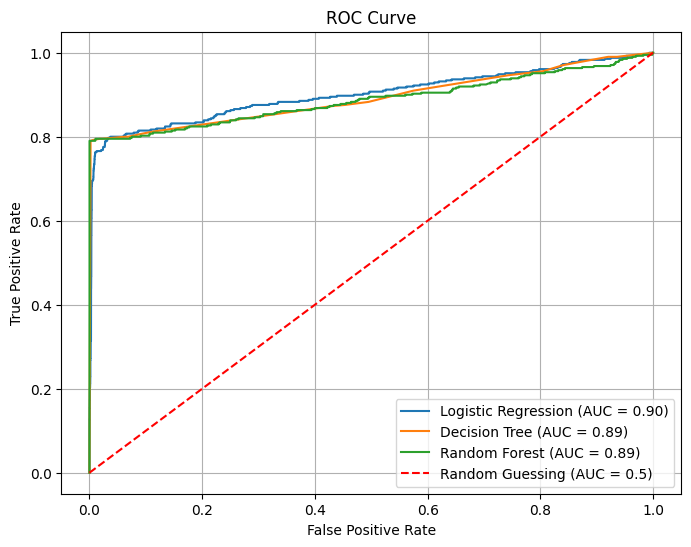

In [30]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)


# Decision Tree
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Random Forest
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Predicted probabilities for Logistic Regression
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Predicted probabilities for Decision Tree
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Predicted probabilities for Random Forest
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curve for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))

# Plot ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing (AUC = 0.5)')

# Set labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np

# Random Forest
best_rf_model = rf_grid_search.best_estimator_
feature_importances_rf = best_rf_model.feature_importances_

# Decision Tree
best_dt_model = dt_grid_search.best_estimator_
feature_importances_dt = best_dt_model.feature_importances_

# Logistic Regression (Coefficient magnitudes)
best_lr_model = lr_grid_search.best_estimator_
coefficients_lr = best_lr_model.coef_[0]


feature_importance_dict = {
    'Random Forest': dict(zip(X.columns, feature_importances_rf)),
    'Decision Tree': dict(zip(X.columns, feature_importances_dt)),
    'Logistic Regression': dict(zip(X.columns, np.abs(coefficients_lr)))
}

# Afficher les 5 caractéristiques les plus importantes pour chaque modèle
for model, feature_importance in feature_importance_dict.items():
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:5]
    print(f"\nTop 5 features for {model}:")
    for feature, importance in top_features:
        print(f"{feature}: {importance:.4f}")



Top 5 features for Random Forest:
stem-width: 0.2246
stem-color: 0.1848
gill-color: 0.1430
does-bruise-or-bleed: 0.0965
gill-attachment: 0.0927

Top 5 features for Decision Tree:
stem-width: 0.5583
gill-attachment: 0.1907
cap-surface: 0.1145
stem-height: 0.0835
cap-color: 0.0242

Top 5 features for Logistic Regression:
stem-width: 1.2021
cap-color: 0.7099
has-ring: 0.3749
stem-color: 0.2432
stem-height: 0.2318


**Interprétation**

Forêt Aléatoire : Les caractéristiques clés incluent la largeur et la couleur de la tige, ainsi que la couleur et la fixation des lamelles, indiquant leur pouvoir discriminant entre champignons comestibles et vénéneux.

Arbre de Décision : La largeur de la tige est la caractéristique principale, suivie de la fixation des lamelles et de la surface du chapeau, soulignant l'importance de la largeur de la tige dans la classification des champignons.

Régression Logistique : La largeur de la tige reste prédominante, suivie de la couleur du chapeau et de la présence d'un anneau, soulignant leur forte influence sur les prédictions du modèle.





